# Uber Trip Analysis in New York 

In [160]:
# import all the Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
# Read the Data

In [124]:
df = pd.read_csv(r"E:\Data Analytics Projects\Python Projects\Uber Trips Analysis\Uber Trips Analysis.csv")

In [125]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [162]:
# Check the Number of Rows and Columns

In [126]:
df.shape

(1028136, 4)

In [166]:
# check the datatype and info

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [167]:
# Check the Null values

In [128]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [168]:
# Check for the Description - only use for numerical data (Statistical data)

In [129]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lat,1028136.0,40.739221,0.040829,39.9897,40.7204,40.7418,40.7612,41.3476
Lon,1028136.0,-73.971817,0.058314,-74.7736,-73.9962,-73.9831,-73.9628,-72.7163


In [169]:
# import the date time library

In [130]:
import datetime as dt

In [131]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"],errors = 'coerce')

In [170]:
# Add some new columns like day, weekday, hour,year and month by usine date time column

In [132]:
df["day"] = df["Date/Time"].dt.day
df["weekday"] = df["Date/Time"].dt.weekday
df["hour"] = df["Date/Time"].dt.hour
df["year"] = df["Date/Time"].dt.year
df["month"] = df["Date/Time"].dt.month

In [133]:
df.head()

,Date/Time,Lat,Lon,Base,day,weekday,hour,year,month
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0,2014,9
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0,2014,9
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0,2014,9
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0,2014,9
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0,2014,9


So I have prepared this data according to the days and hours, as I am using the Uber trips for the September month so let’s have a look at each day to see on which day the Uber trips were highest

C:\Users\Mohan\AppData\Local\Temp\ipykernel_16508\1970835712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day'])


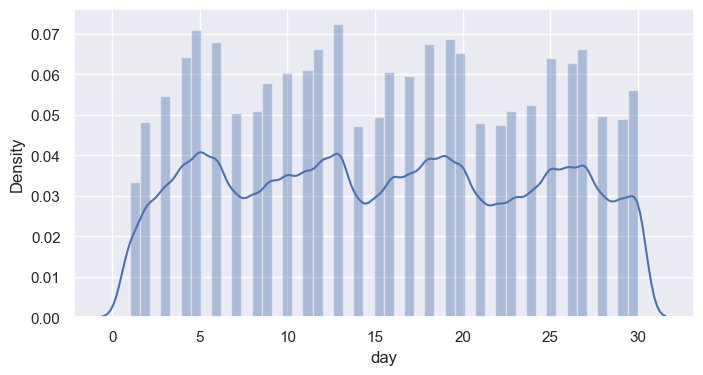

In [135]:
plt.figure(figsize = (8,4))
sns.distplot(df['day'])
plt.show()

By looking at the daily trips we can say that the Uber trips are "Rising" on the "Working days" and "decreases" on the "weekends". 

C:\Users\Mohan\AppData\Local\Temp\ipykernel_16508\2078492195.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["hour"])


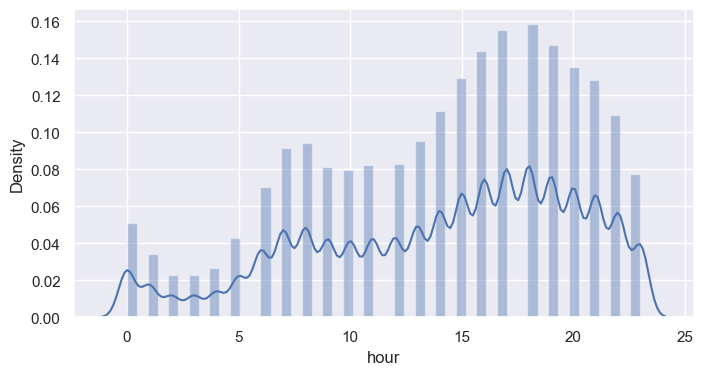

In [136]:
plt.figure (figsize = (8,4))
sns.distplot(df["hour"])
plt.show()

According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 AM and the trips keep rising till 6 PM. The 6 pm is the busiest hours for Uber and then the trips start decreasing.

C:\Users\Mohan\AppData\Local\Temp\ipykernel_16508\2412062138.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["weekday"])


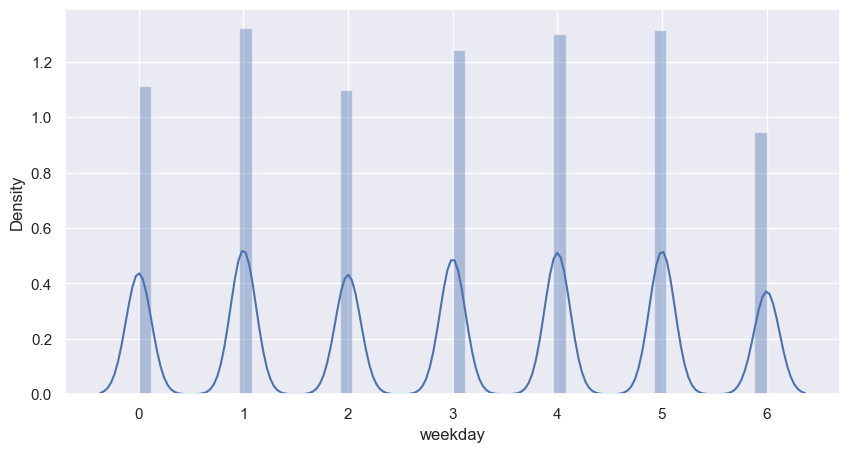

In [137]:
plt.figure(figsize=(10,5))
sns.distplot(df["weekday"])
plt.show()

In the above figure shows that 0 indicates Sunday and 6 indicates Saturday. On Sundays the Uber trips and more than Saturdays so  we can say that peoples also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, the Uber trips are the highest. 

In [147]:
df1 = df.groupby(["weekday","hour"]).apply(lambda x: len(x))
df1 = df1.unstack()

<Axes: xlabel='hour', ylabel='weekday'>

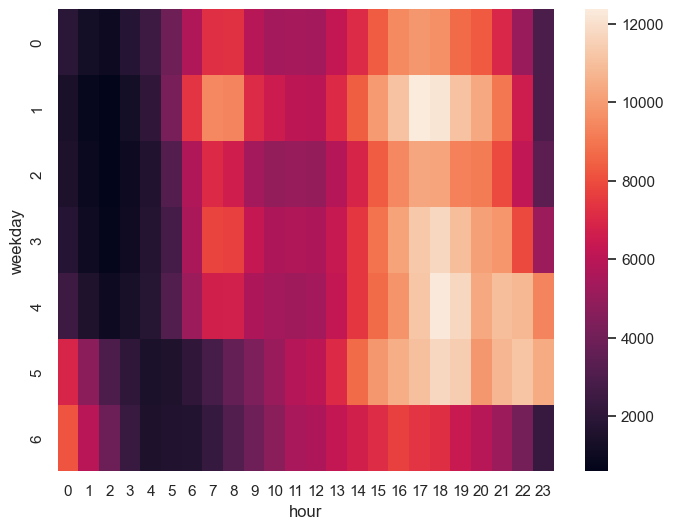

In [148]:
sns.heatmap(df1, annot=False)

As we know that, heatmap indicates the relationship b/w two variables using color intensity.

In above graph shows, 6 PM is the busiest hours on Monday and Thursday.

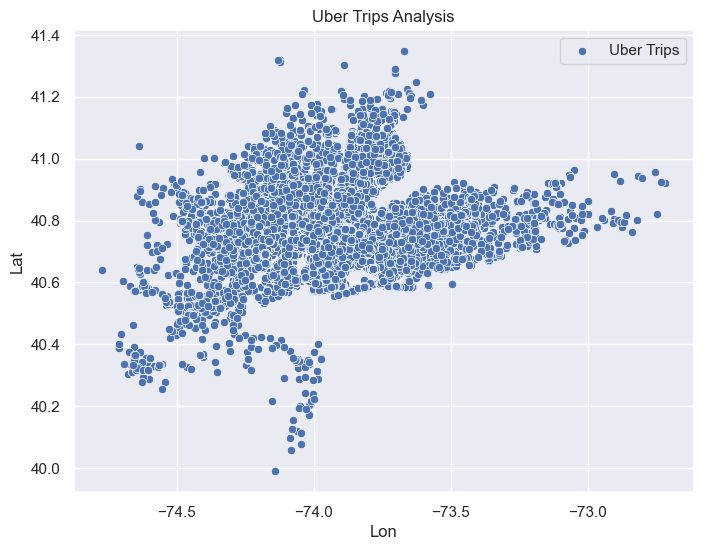

In [159]:
sns.scatterplot(data =df, y = "Lat", x = "Lon", label='Uber Trips')
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city

# Summary:

Some of the conclusion I got from this analysis are :

    1. Monday is the most Profitable day for Uber.
    2. On Saturdays less number of people use Uber.
    3. 6 Pm is the Busiest day for Uber.
    4. The Uber Trips Start around 5 AM.
    6. Most of the Uber Trips are originated near the Manhattan Region in New York City.
    
